PANDAS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore

import pandas as pd             # type: ignore


In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';', dtype={'male': bool})

howell.head()

howell.describe(percentiles=[0.05, 0.95])

In [ ]:
young_people = howell[howell['age'] < 18]
young_people.describe()

In [ ]:
import matplotlib.pyplot as plt

young_people = howell[howell['age'] < 18]
adult_people = howell[howell['age'] >= 18]

plt.hist(young_people['height'], alpha=0.5, label='young')
plt.hist(adult_people['height'], alpha=0.5, label='adult')
plt.legend()
plt.xlabel('Height (in)')
plt.ylabel('Count')
plt.title('Distribution of Height by Age Group')
plt.show()


In [ ]:
adult_males = howell[(howell['age'] >= 18) & (howell['male'] == True)]
adult_females = howell[(howell['age'] >= 18) & (howell['male'] == False)]

plt.hist(adult_males['height'], alpha=0.5, label='male')
plt.hist(adult_females['height'], alpha=0.5, label='female')
plt.legend()
plt.xlabel('Height (in)')
plt.ylabel('Count')
plt.title('Distribution of Height by Gender')
plt.show()

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

adult_people = howell[howell['age'] >= 18]
height_data = adult_people['height'].values

mu, sigma = norm.fit(height_data)

plt.hist(height_data, bins=20, density=True, alpha=0.5, label='data')
x = np.linspace(height_data.min(), height_data.max(), 100)
plt.plot(x, gaussian(x, mu, sigma), label='fit')
plt.legend()
plt.xlabel('Height (in)')
plt.ylabel('Density')
plt.title('Comparison of Height Distribution and Gaussian Fit')
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

adult_people = howell[howell['age'] >= 18]
height_data = adult_people['height'].values

mu, sigma = np.mean(height_data), np.std(height_data)
sample = np.random.normal(mu, sigma, size=len(height_data))

plt.hist(height_data, bins=20, density=True, alpha=0.5, label='data')
plt.hist(sample, bins=20, density=True, alpha=0.5, label='sample')
plt.legend()
plt.xlabel('Height (in)')
plt.ylabel('Density')
plt.title('Comparison of Height Distribution and Sampled Values')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sum_uniform(n):
    return np.sum(np.random.uniform(-1, 1, size=n))

n = 20
num_replicas = 1000
sum_vals = np.array([sum_uniform(n) for i in range(num_replicas)])

mu, sigma = 0, np.sqrt(n / 12)

plt.hist(sum_vals, bins=20, density=True, alpha=0.5, label='sum of uniform values')
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label='gaussian with same mean and std')
plt.legend()
plt.xlabel('Sum of uniform values')
plt.ylabel('Density')
plt.title('Comparison of Sum of Uniform Values and Gaussian Distribution')
plt.show()


In [ ]:

np.random.seed(0) # Set seed for reproducibility

replicas = 1000
values_per_replica = 20

uniform_samples = np.random.uniform(low=-0.1, high=0.1, size=(replicas, values_per_replica)) + 1
product_samples = np.prod(uniform_samples, axis=1)

# Plot the distribution of the product samples
plt.hist(product_samples, bins=100, density=True)

# Plot the Gaussian distribution with the same mean and standard deviation
mean = np.mean(product_samples)
std = np.std(product_samples)
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (x - mean)**2 / std**2)
plt.plot(x, y, 'r', label='Gaussian')

plt.legend()
plt.show()


In [ ]:
adult = howell[howell['age'] >= 18]
plt.scatter(adult['height'], adult['weight'])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [ ]:
howell['bmi'] = howell['weight'] / (howell['height'] / 100)**2


In [ ]:
# Select columns to include in scatter matrix
cols = ['height', 'weight', 'age', 'bmi']

pd.plotting.scatter_matrix(howell[cols], figsize=(10, 10))
plt.tight_layout()
plt.show()

PYMC HOWELL

In [1]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore

import pandas as pd   

In [2]:
howell: pd.DataFrame

try:
    howell = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';', dtype={'male': bool})
except:
    howell = pd.read_csv('Howell1.csv', sep=';', dtype={'male': bool})

In [3]:
import pymc as pm   # type: ignore
import arviz as az  # type: ignore


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
norm_height = pm.Model()

with norm_height:
    mu = pm.Normal('mu_h', 170, 20)
    sigma = pm.Uniform('sigma_h', 0, 50)
    h = pm.Normal('height', mu, sigma)


In [5]:
pm.draw(mu, draws=1000)

array([187.53577986, 148.86909274, 132.61417987, 176.00424544,
       180.19923788, 150.73340205, 172.99806156, 172.74938015,
       140.22211081, 179.55728436, 167.95358443, 159.69167734,
       143.26745591, 146.43143496, 138.24208486, 141.82467331,
       169.36032828, 180.43281224, 155.84388727, 161.77959187,
       152.85913162, 153.49245638, 150.09725608, 156.35266965,
       149.92147774, 155.08272856, 180.19810521, 184.37821818,
       154.10134216, 154.66057304, 139.7755687 , 157.88732801,
       194.53855033, 153.33894958, 203.29677759, 183.56637124,
       178.95310018, 206.64780318, 185.52740075, 149.57633814,
       220.10876161, 183.37457459, 129.04994789, 173.97635887,
       173.79531932, 166.67820215, 168.18298796, 192.85940104,
       173.05196278, 137.59980879, 217.15839618, 158.73564515,
       201.84321201, 167.06288248, 168.26646509, 166.71817511,
       169.53438593, 161.54974863, 191.82103866, 158.62457815,
       132.2191981 , 187.91754737, 164.48921956, 189.44

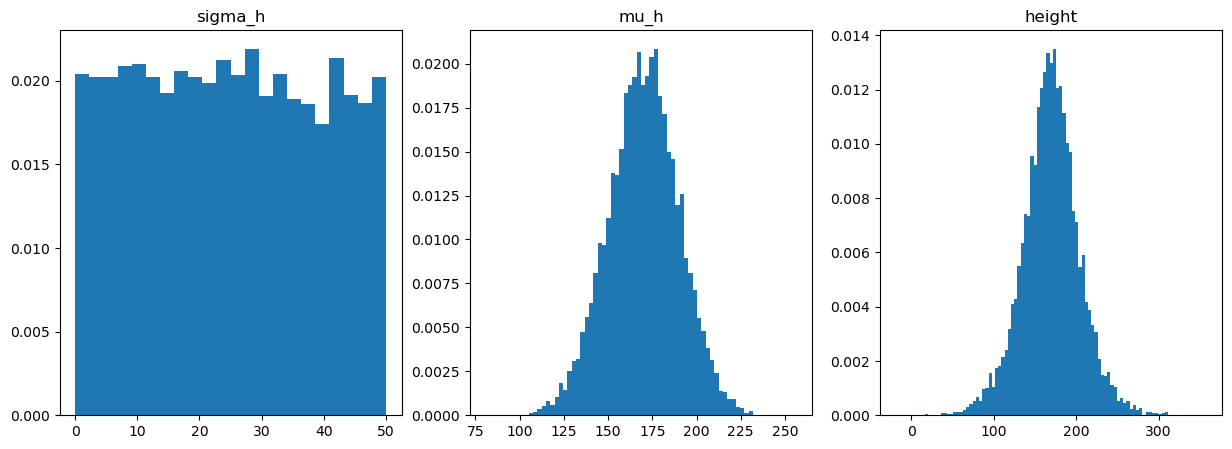

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].hist(pm.draw(sigma, draws=10000), bins='auto', density=True)
ax[0].set_title(str(sigma))
ax[1].hist(pm.draw(mu, draws=10000), bins='auto', density=True)
ax[1].set_title(str(mu))
ax[2].hist(pm.draw(h, draws=10000), bins='auto', density=True)
_ = ax[2].set_title(str(h))

In [7]:
adult_males = howell.query('male & age >= 18')

# +
norm_height_am = pm.Model()

with norm_height_am:
    mu = pm.Normal('mu_h', 170, 20)
    sigma = pm.Uniform('sigma_h', 0, 50)
    h = pm.Normal('height', mu, sigma, observed=adult_males['height'])
# -


In [8]:
with norm_height_am:
    idata = pm.sample(chains=4, progressbar=False)

az.summary(idata)

post = az.extract(idata, combined=True).to_pandas()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_h, sigma_h]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 102 seconds.


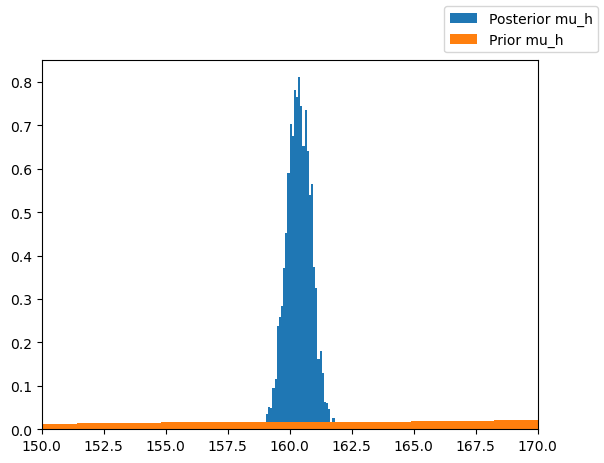

In [9]:
sim_mu = pm.draw(mu, draws=4000)

fig, ax = plt.subplots()
ax.hist(post['mu_h'], bins='auto', density=True, label='Posterior mu_h')
ax.hist(sim_mu, bins='auto', density=True, label='Prior mu_h')
ax.set_xlim((150, 170))
_ = fig.legend()

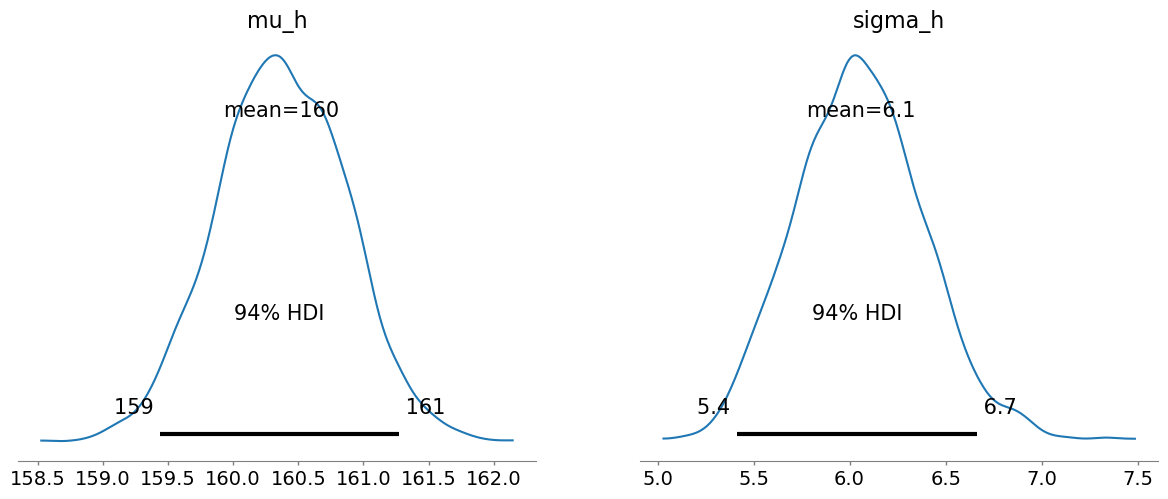

In [10]:
with norm_height_am:
    pm.plot_posterior(idata)



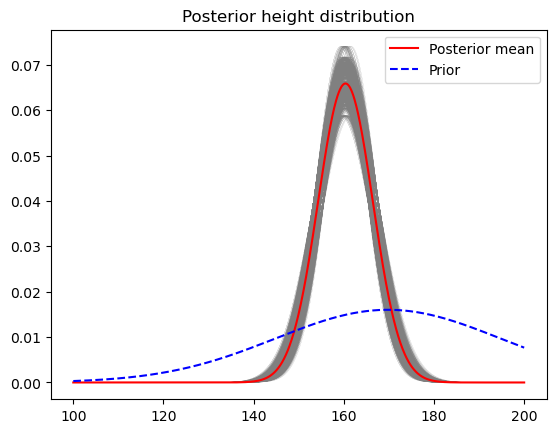

In [11]:
def gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    return (1/(2*np.pi*sigma**2)**.5)*np.exp(-(x - mu)**2/(2*sigma**2))


prior_mu = pm.draw(mu, draws=10000).mean()
prior_sigma = pm.draw(sigma, draws=10000).mean()

fig, ax = plt.subplots()
x = np.linspace(100, 200, 1000)
for m in range(0, len(post['mu_h']), 100):
    for s in range(0, len(post['sigma_h']), 100):
        ax.plot(x, gaussian(x, post['mu_h'].iloc[m],
                            post['sigma_h'].iloc[s]),
                color='gray', linewidth=.1)
ax.plot(x, gaussian(x, post['mu_h'].mean(),
                    post['sigma_h'].mean()), color='red', 
       label='Posterior mean')
ax.plot(x, gaussian(x, prior_mu,
                       prior_sigma), color='blue', 
        linestyle='dashed', label='Prior')
ax.set_title('Posterior height distribution')
_ = ax.legend()

In [12]:
linear_regression = pm.Model()

with linear_regression:
    sigma = pm.Uniform('sigma_h', 0, 50)
    alpha = pm.Normal('alpha', 178, 20)
    beta = pm.Normal('beta', 0, 10)
    mu = alpha + beta*(adult_males['weight'] - adult_males['weight'].mean())
    h = pm.Normal('height', mu, sigma, observed=adult_males['height'])
# -

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_h, alpha, beta]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 162 seconds.


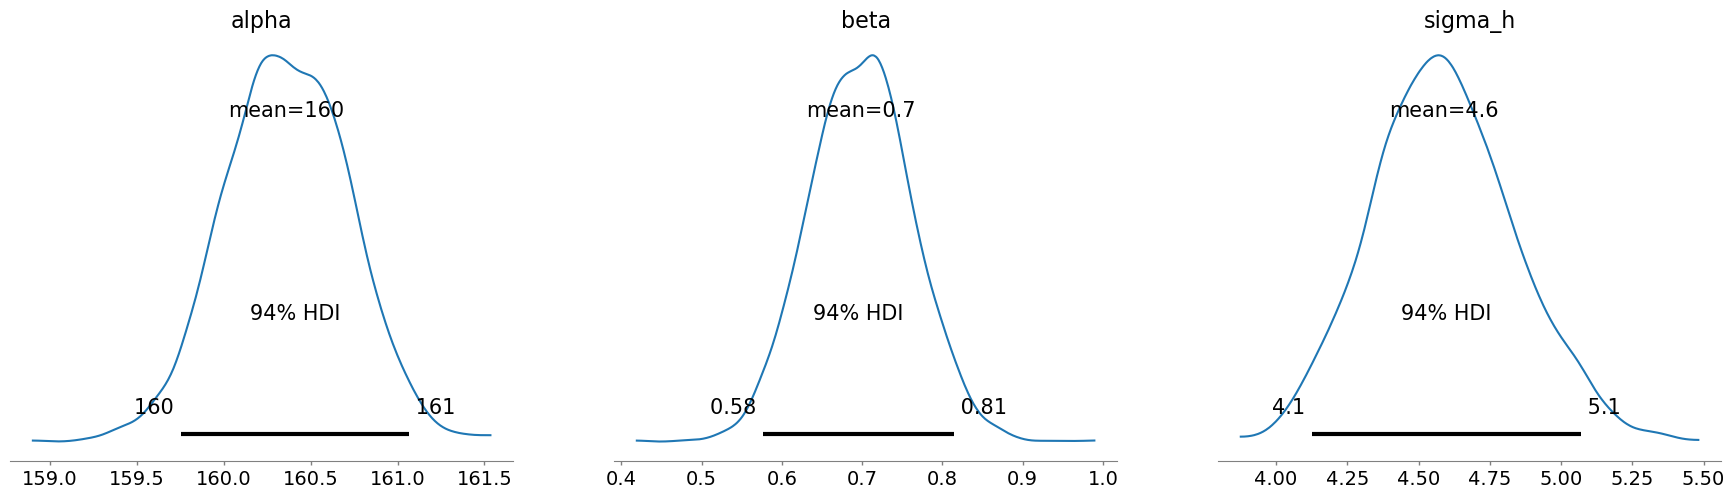

In [13]:
with linear_regression:
    idata_regression = pm.sample(chains=4, progressbar=False)

r_post = az.extract(idata_regression, combined=True).to_pandas()
# -

with linear_regression:
    pm.plot_posterior(idata_regression)
    

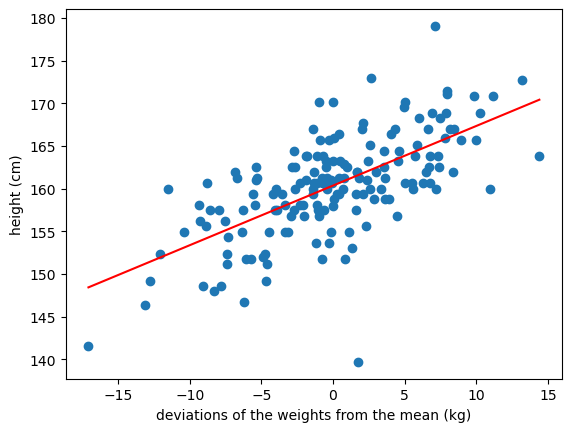

In [14]:
d_weight = adult_males['weight'] - adult_males['weight'].mean()

x = np.linspace(d_weight.min(), d_weight.max(), 100)


fig, ax = plt.subplots()
ax.scatter(d_weight, adult_males['height'])
ax.set_ylabel('height (cm)')
ax.set_xlabel('deviations of the weights from the mean (kg)')
_ = ax.plot(x, r_post['alpha'].mean() +
            r_post['beta'].mean()*x,
            color='red')
